# TP: Machine Learning (SIA_3611)

## TP3: Clustering (4h) 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [2]:
import pandas as pd   
import numpy as np     
import matplotlib.pyplot as plt  
import matplotlib.colors    

# Load the CSV file 'Life_Expectancy_Data.csv' into a pandas DataFrame.
df = pd.read_csv("data-20241007/Life_Expectancy_Data.csv")

# Remove any rows in the DataFrame that contain missing values (NaN).
df = df.dropna()

# Display a concise summary of the DataFrame, including the number of non-null values and data types of each column.
df.info()

# Create a new DataFrame 'df1' by filtering 'df' to include only rows where the 'Year' column has the value 2013.
df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

    Longitude   Latitude
2   66.004734  33.835231
18  20.049834  41.142450
34   2.617323  28.158938
50  17.537368 -12.293361
82 -65.179807 -35.381349


/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_2238/3044911957.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'],


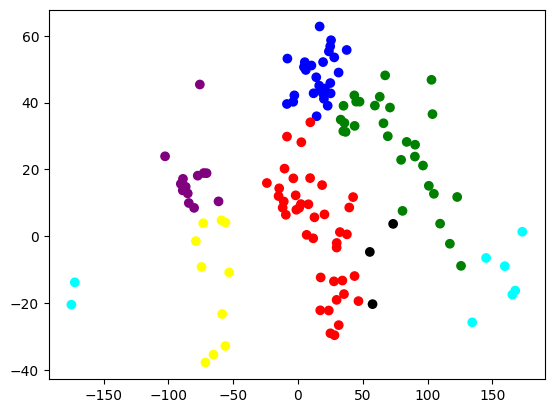

In [4]:
df_X = df1[['Longitude', 'Latitude']]    # Select 'Longitude' and 'Latitude' columns from the DataFrame df1 
df_Status = df1[['Continent']]           # Select the 'Continent' column from df1 

# Replace the continent names in df_Status with numeric values 
df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'],
                         [0, 1, 2, 3, 4, 5, 6])

# Convert to a NumPy array.
np_Y = df_Y.to_numpy()

# Reshape the array into a one-dimensional vector
np_Y = np_Y.reshape((np_Y.shape[0],))    

# Print the first few rows of df_X
print(df_X.head())

# Converet to numpy 
np1 = df_X.to_numpy()    

# Create a scatter plot of the longitude (np1[:, 0]) vs. latitude (np1[:, 1]).
# The color of each point is determined by the corresponding continent value (np_Y), 
plt.scatter(np1[:, 0], np1[:, 1], c=np_Y,
            cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))

# Display the scatter plot.
plt.show()    

**QUESTION 1**

Identify each class with the plot colors

    rouge : Afrique
    
    vert : Asie
    
    bleu : Europe
    
    violet : Amérique du Nord
    
    jaune : Amérique du Sud
    
    noir : Sept mers
    
    cyan : Océanie


What do the coordinates correspond to?

    Les coordonnées dans le graphique correspondent aux longitudes et latitudes des différents pays présents dans les données.

**TO DO 1.2**

Execute the following cell


<module 'matplotlib.pyplot' from '/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

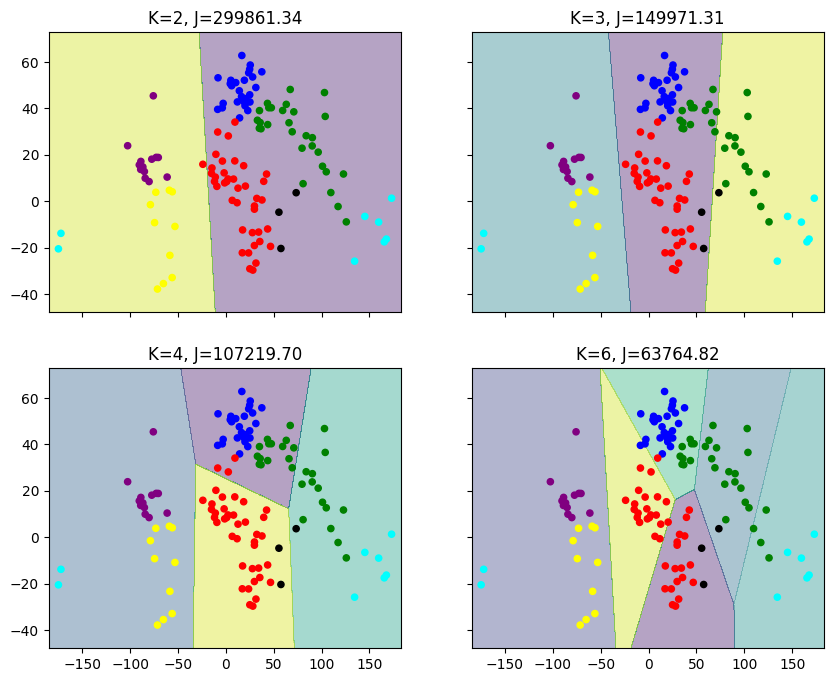

In [6]:
from itertools import product    
from sklearn import cluster   

# Determine the minimum and maximum values for the x-axis (longitude) with an extra margin of 10 units for better visualization.
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10

# Determine the minimum and maximum values for the y-axis (latitude) with an extra margin of 10 units for better visualization.
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10

# Create a mesh grid for the x and y coordinates at intervals of 0.1 for contour plotting.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Apply the KMeans clustering algorithm with 2 clusters and fit it to the longitude and latitude data (np1).
km2 = cluster.KMeans(n_clusters=2).fit(np1)

# Apply KMeans with 3 clusters and fit it to the data.
km3 = cluster.KMeans(n_clusters=3).fit(np1)

# Apply KMeans with 4 clusters and fit it to the data.
km4 = cluster.KMeans(n_clusters=4).fit(np1)

# Apply KMeans with 6 clusters and fit it to the data.
km6 = cluster.KMeans(n_clusters=6).fit(np1)

# Create a 2x2 subplot grid for visualizing the clustering results, sharing the x-axis and y-axis across subplots.
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

# Iterate over the Cartesian product of indices (0, 1) for 2 rows and 2 columns, 
# along with the fitted KMeans models (km2, km3, km4, km6), and their respective titles showing the inertia (J) values.
for idx, km, tt in zip(product([0, 1], [0, 1]),
                       [km2, km3, km4, km6],
                       ["K=2, J=%.2f" % km2.inertia_,
                        "K=3, J=%.2f" % km3.inertia_,
                        "K=4, J=%.2f" % km4.inertia_,
                        "K=6, J=%.2f" % km6.inertia_]):

    # Predict the cluster assignments for each point in the mesh grid using the current KMeans model.
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predicted cluster assignments (Z) to match the shape of the mesh grid for contour plotting.
    Z = Z.reshape(xx.shape)

    # Plot the contour map on the current subplot, coloring the different clusters with transparency (alpha=0.4).
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)

    # Scatter plot the actual data points (longitude, latitude) with their true continent-based colors on top of the contour plot.
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))

    # Set the title for the subplot to show the number of clusters (K) and the inertia (J) value
    axarr[idx[0], idx[1]].set_title(tt)

# Display the final plot with all the subplots.
plt

**QUESTION 2**

How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?

L'inertie mesure la qualité des clusters en calculant la somme des distances au carré entre les points de données et le centroïde de leur cluster attribué.utiliser uniquement l'inertie pour comparer les clusters peut être trompeur, car elle tend à diminuer lorsque le nombre de clusters augmente, même si la qualité des clusters diminue.

Silhouette Index : Il combine la compacité et la séparation en mesurant à quel point un point est similaire à son propre cluster par rapport aux autres clusters

Which is the main problem with the mercator representation for continent detection?


## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

    Longitude   Latitude
2   36.004734  33.835231
18  -9.950166  41.142450
34 -27.382677  28.158938
50 -12.462632 -12.293361
82 -95.179807 -35.381349


/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_5287/784344742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'] -30
/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_5287/784344742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'].apply(lambda x: x +360 if x < -180 else x)
/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_5287/784344742.py:8: FutureWarning: Downcasting behavior in `replace` is depre

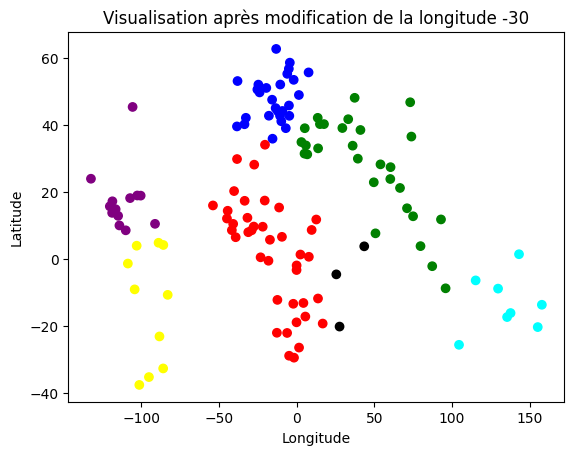

In [18]:
# Select the 'Longitude' and 'Latitude' columns 
df_X = df1[['Longitude', 'Latitude']]    

# Adjust the longitude by subtracting 30 units for all entries.
df_X['Longitude'] = df_X['Longitude'] - 30

# Apply a lambda function to adjust longitudes less than -180 by adding 360 to them (to keep the values in a valid range).
df_X['Longitude'] = df_X['Longitude'].apply(lambda x: x + 360 if x < -180 else x)

# Print the first five rows of df_X to see the modified longitude and latitude values.
print(df_X.head())

# Select the 'Continent' column from df1 and store it in df_Status.
df_Status = df1[['Continent']]  

# Replace the continent names with numeric codes
df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'],
                         [0, 1, 2, 3, 4, 5, 6])

# Convert df_Y (the continent codes) to a NumPy array and reshape it into a 1D array.
np_Y = df_Y.to_numpy().reshape((df_Y.shape[0],))

# Convert to a NumPy array.
np1 = df_X.to_numpy()

# Create a scatter plot of the modified longitude (np1[:, 0]) and latitude (np1[:, 1]), 
# with different colors representing the continents.
plt.scatter(np1[:, 0], np1[:, 1], c=np_Y,
            cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))

# Label the x-axis as 'Longitude' and the y-axis as 'Latitude'.
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set the title of the plot to indicate that the longitudes have been modified by subtracting 30.
plt.title('Visualisation après modification de la longitude -30')

# Display the scatter plot.
plt.show()

**QUESTION 3**

What are the advantages of this normalization?



**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

<module 'matplotlib.pyplot' from '/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

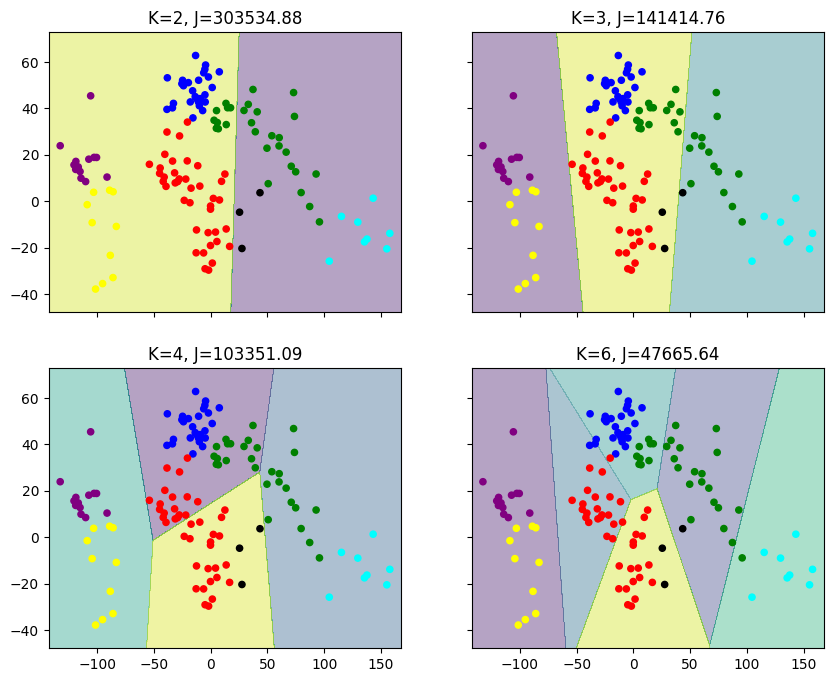

In [19]:
from itertools import product
from sklearn import cluster
from sklearn.mixture import GaussianMixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

<module 'matplotlib.pyplot' from '/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

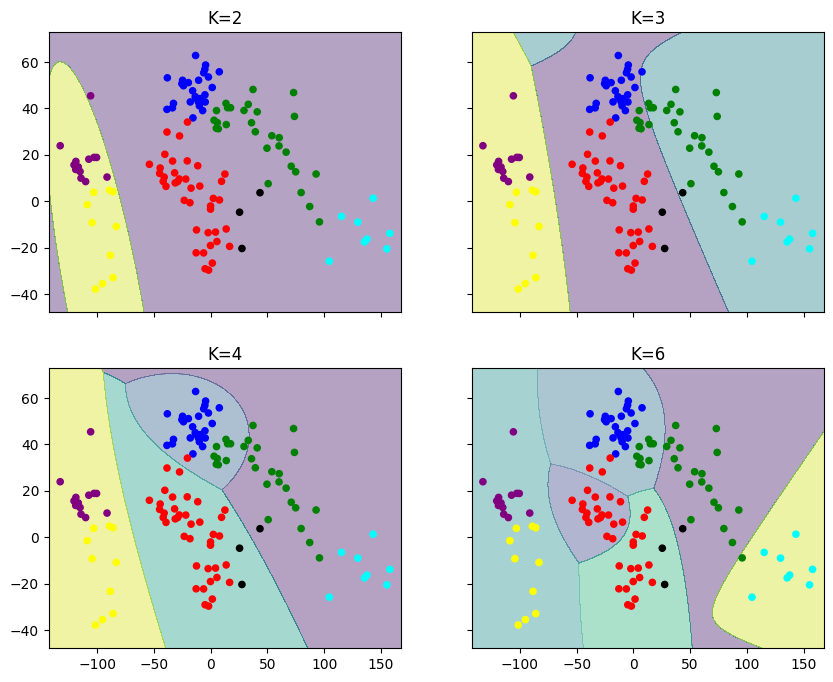

In [20]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gmm2 = GaussianMixture(n_components=2).fit(np1)
gmm3 = GaussianMixture(n_components=3).fit(np1)
gmm4 = GaussianMixture(n_components=4).fit(np1)
gmm6 = GaussianMixture(n_components=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [gmm2, gmm3, gmm4, gmm6],
                        ["K=2",
                         "K=3", 
                         "K=4", 
                         "K=6"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     


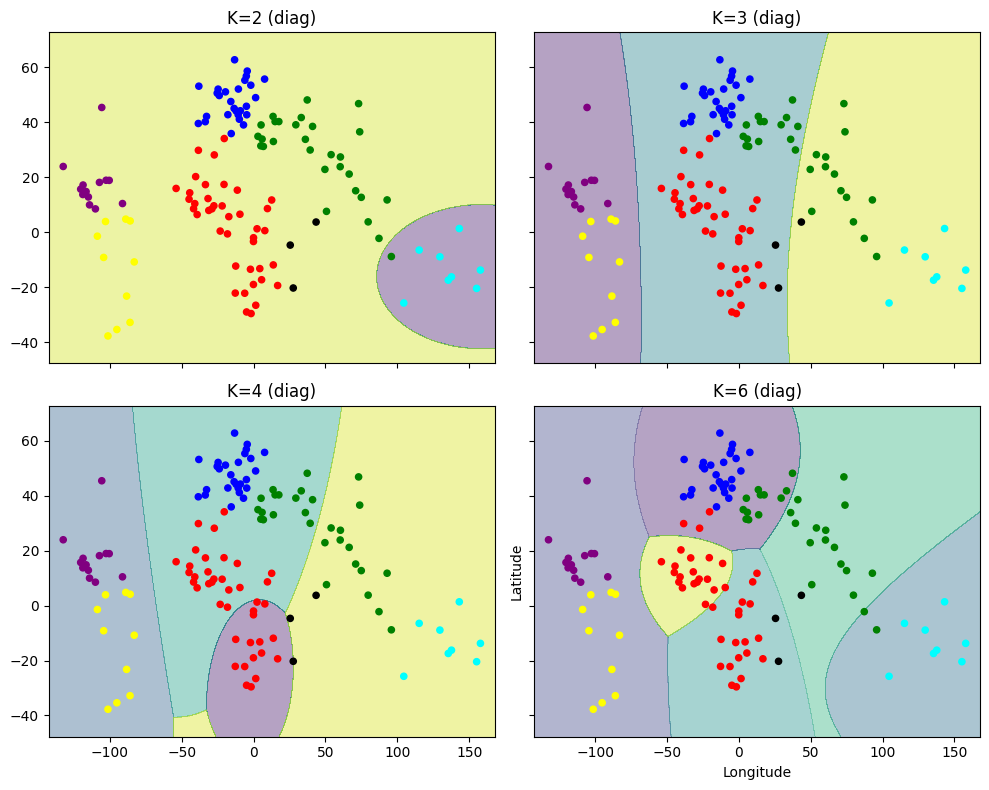

In [21]:
# GMM avec matrice de covariance diagonale
gmm2 = GaussianMixture(n_components=2, covariance_type='diag').fit(np1)
gmm3 = GaussianMixture(n_components=3, covariance_type='diag').fit(np1)
gmm4 = GaussianMixture(n_components=4, covariance_type='diag').fit(np1)
gmm6 = GaussianMixture(n_components=6, covariance_type='diag').fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [gmm2, gmm3, gmm4, gmm6],
                        ["K=2 (diag)",
                         "K=3 (diag)", 
                         "K=4 (diag)", 
                         "K=6 (diag)"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                   s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

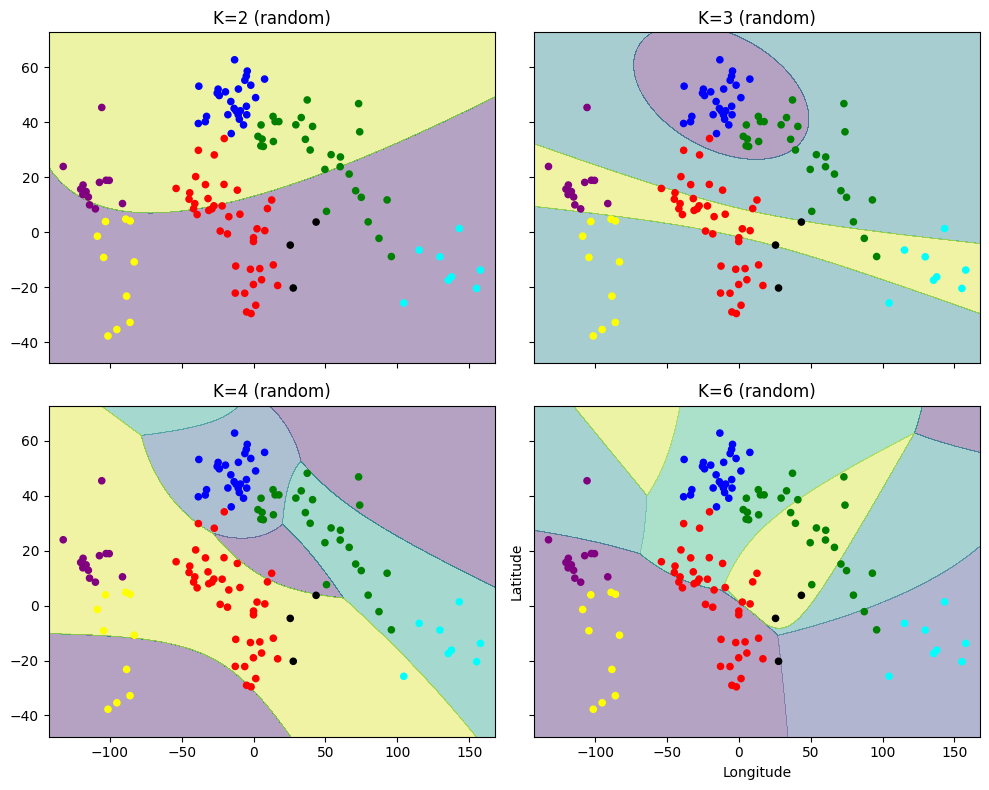

In [22]:
# Définir les bornes pour le contour
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# GMM avec initialisation aléatoire
gmm2 = GaussianMixture(n_components=2, init_params='random').fit(np1)
gmm3 = GaussianMixture(n_components=3, init_params='random').fit(np1)
gmm4 = GaussianMixture(n_components=4, init_params='random').fit(np1)
gmm6 = GaussianMixture(n_components=6, init_params='random').fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [gmm2, gmm3, gmm4, gmm6],
                        ["K=2 (random)",
                         "K=3 (random)", 
                         "K=4 (random)", 
                         "K=6 (random)"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                   s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

**QUESTION 4**

Which is the best method to detect continents?

For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

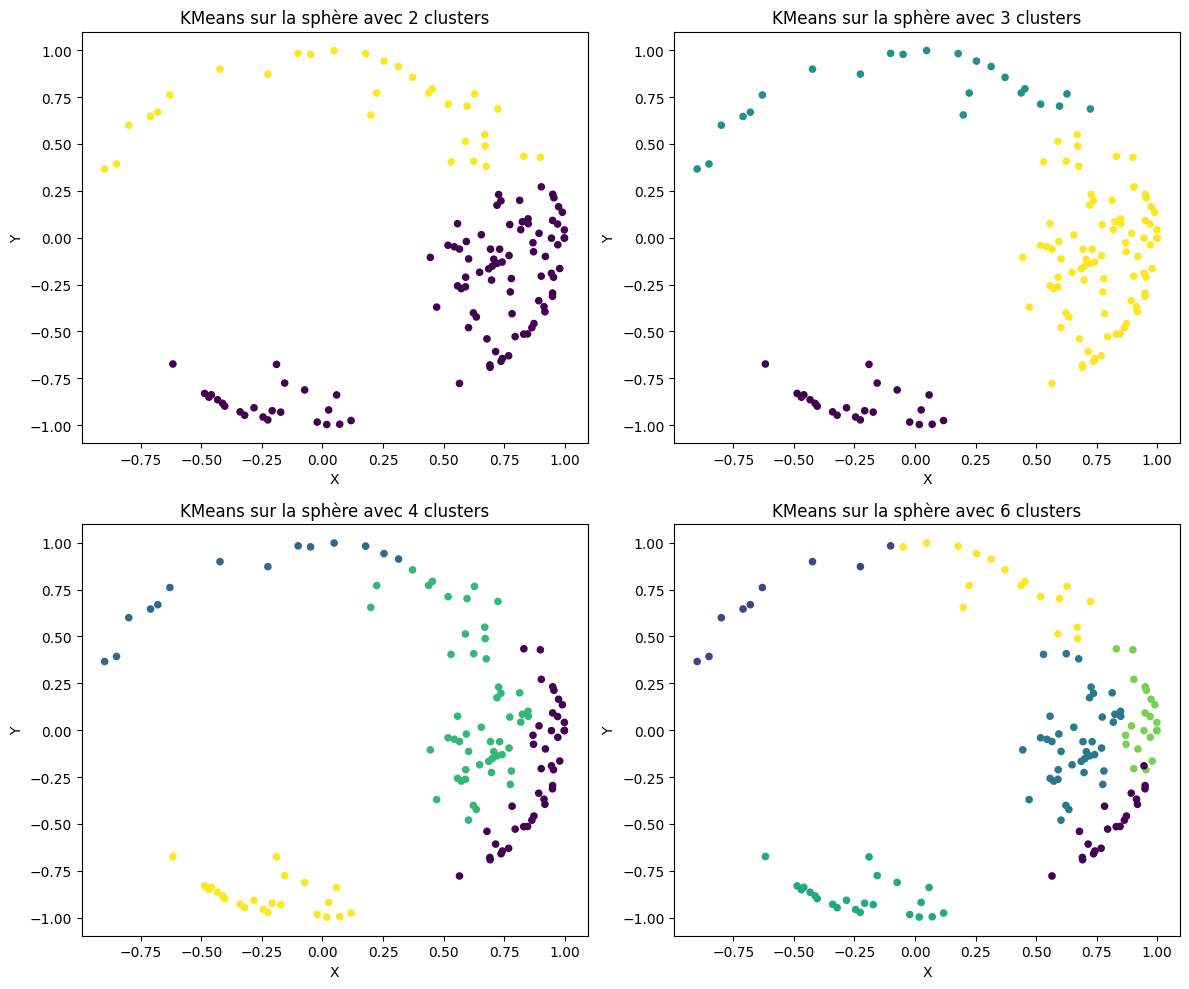

ValueError: X has 2 features, but KMeans is expecting 3 features as input.

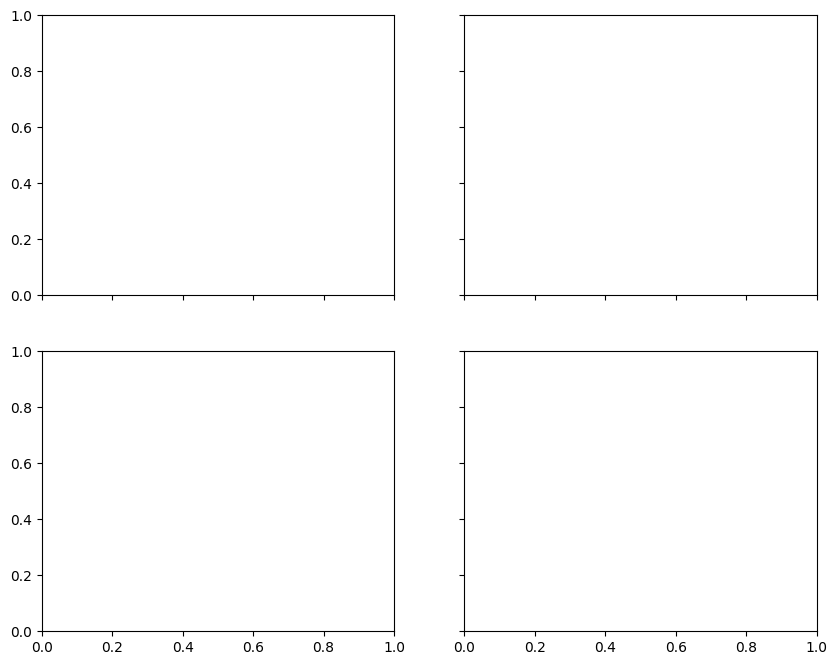

In [23]:
# Convertir les coordonnées géographiques (longitude, latitude) en coordonnées cartésiennes
longitude = np.radians(np1[:, 0])
latitude = np.radians(np1[:, 1])

x = np.cos(latitude) * np.cos(longitude)
y = np.cos(latitude) * np.sin(longitude)
z = np.sin(latitude)

# Créer un tableau 2D pour les coordonnées cartésiennes
cartesian_coordinates = np.vstack((x, y, z)).T

# Appliquer KMeans avec 2, 3, 4 et 6 clusters
n_clusters = [2, 3, 4, 6]
results = {}

for n in n_clusters:
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    kmeans.fit(cartesian_coordinates)
    results[n] = kmeans.labels_

# Visualiser les résultats
plt.figure(figsize=(12, 10))
for i, n in enumerate(n_clusters):
    plt.subplot(2, 2, i + 1)
    plt.scatter(cartesian_coordinates[:, 0], cartesian_coordinates[:, 1], c=results[n], cmap='viridis', s=20)
    plt.title(f'KMeans sur la sphère avec {n} clusters')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()
######################################################################
longitude = np.radians(np1[:, 0])
latitude = np.radians(np1[:, 1])

x = np.cos(latitude) * np.cos(longitude)
y = np.cos(latitude) * np.sin(longitude)
z = np.sin(latitude)

km2 = cluster.KMeans(n_clusters=2).fit(cartesian_coordinates)
km3 = cluster.KMeans(n_clusters=3).fit(cartesian_coordinates)
km4 = cluster.KMeans(n_clusters=4).fit(cartesian_coordinates)
km6 = cluster.KMeans(n_clusters=6).fit(cartesian_coordinates)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt 

## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

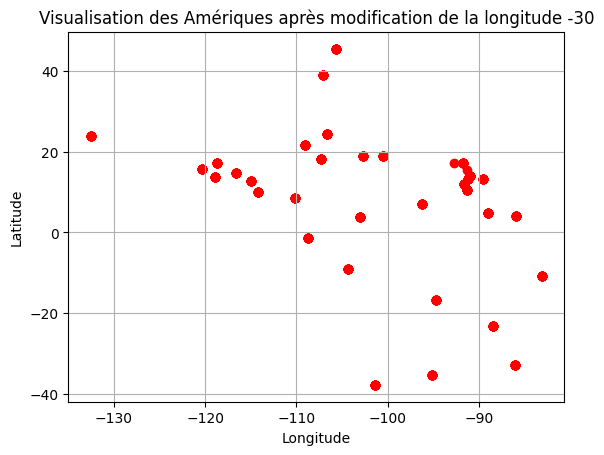

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df1 = pd.read_csv('data-20241007/Life_Expectancy_Data.csv')

# Ajuster les longitudes
df_X = df1[['Longitude', 'Latitude']].copy()  # Créer une copie pour ne pas modifier l'original
df_X['Longitude'] = df_X['Longitude'] - 30
df_X['Longitude'] = df_X['Longitude'].apply(lambda x: x + 360 if x < -180 else x)

# Filtrer pour toutes les Amériques (Amérique du Nord et Amérique du Sud)
# Ajustez les limites pour inclure les latitudes de l'Amérique du Sud
americas = df_X[(df_X['Longitude'].between(-168.0, -70.0)) & (df_X['Latitude'].between(-60.0, 60.0))]

# Convertir en numpy pour le traçage
np1 = americas.to_numpy()

# Visualiser
plt.scatter(np1[:, 0], np1[:, 1], c='red')  # Utiliser une couleur unique pour l'Amérique
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualisation des Amériques après modification de la longitude -30')
plt.grid()
plt.show()


**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

**QUESTION 5**

Which is the outlier of this clustering problem?

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_5287/1005647255.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


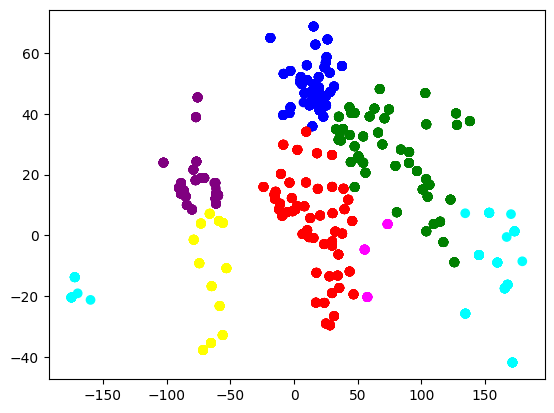

In [26]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


In [27]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5568384122447243


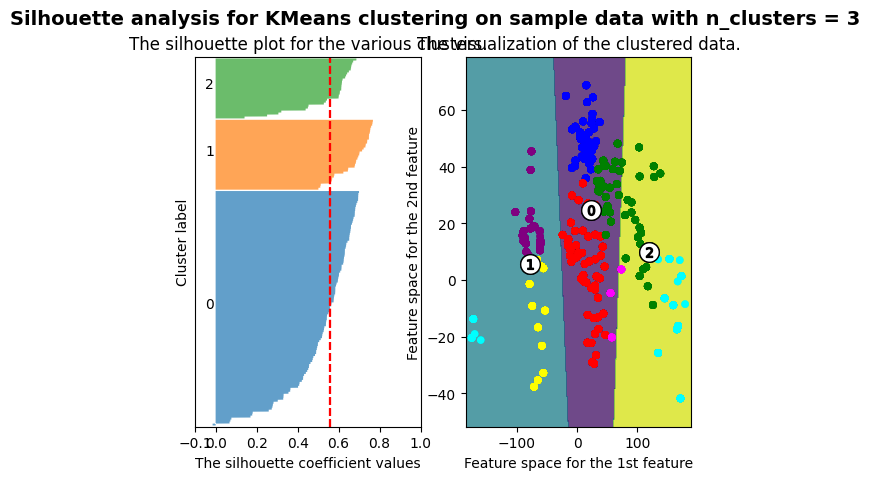

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

**Question 6** 

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?